## Loading data

In [2]:
import torch
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Define a transform to convert the images to tensor
transform = transforms.Compose([transforms.ToTensor()])

In [4]:
# Download the MNIST training dataset
mnist_train = datasets.MNIST(root='../data', train=True, download=True, transform=transform)

# Download the MNIST test dataset
mnist_test = datasets.MNIST(root='../data', train=False, download=True, transform=transform)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 64348824.63it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 13373337.80it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 54624442.35it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 6272811.58it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
# Convert to NumPy arrays
train_data_np = mnist_train.data.numpy()

In [6]:
image = train_data_np[0]

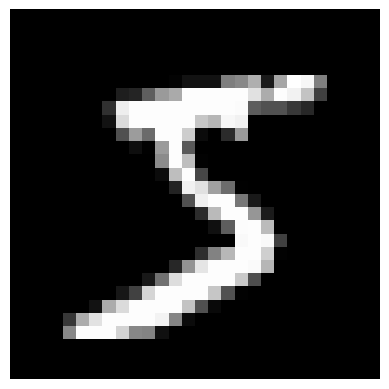

In [7]:
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# data processing


In [14]:
from torch.utils.data import DataLoader
train_loader = DataLoader(dataset=mnist_train, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=mnist_test, batch_size=64, shuffle=False)

In [15]:
for images, labels in train_loader:
    print(f"Batch of images shape: {images.shape}")
    print(f"Batch of labels shape: {labels.shape}")
    break  # Remove this line to iterate through the entire DataLoader

Batch of images shape: torch.Size([64, 1, 28, 28])
Batch of labels shape: torch.Size([64])


# Building simple NN

In [1]:
import torch.nn as nn

In [2]:
# Define the MLP model
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  # Input layer to first hidden layer
        self.fc2 = nn.Linear(128, 64)     # First hidden layer to second hidden layer
        self.fc3 = nn.Linear(64, 10)      # Second hidden layer to output layer

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = torch.relu(self.fc1(x))  # Apply ReLU activation
        x = torch.relu(self.fc2(x))  # Apply ReLU activation
        x = self.fc3(x)  # Output layer
        return x

In [3]:
Neural_Network = NN()

In [4]:
Neural_Network

NN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)